# Tutorial
- Train / test on Monk datasets
    - SGD
    - BFGS
    - L-BFGS

- Train / test on ML-Cup dataset
    - SGD
    - BFGS
    - L-BFGS

- Perform grid search
    - SGD
    - BFGS
    - L-BFGS
- Save and load network parametes

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [5]:
# choose monk dataset
monk = str(3)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
X_train, X_test = decode_patterns(encoding, features, train_data, test_data)
Y_train, Y_test = transform_labels(train_data, test_data)

--------------------------------------
# ML-Cup with SGD, BFGS and L-BFGS

### Load ML-Cup dataset

In [2]:
# 1. read file train set
df = pd.read_csv("../MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns,labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns,labels, fraction_tr=0.8)

## SGD - cup

In [ ]:
architecture = [17, 10, 10, 2] #[17, 100, 50, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

learning_rate = 0.2
momentum = 0.9
lambda_ = 0#1 * 1e-3
batch_size = len(X_train)
epsilon = 1e-5
epochs = 3#7000

network = Network(architecture, neurons)

In [ ]:
tic = time()
# 5. train
loss_tr_sgd, miss_train, \
loss_ts_sgd, miss_test, norm_gradients_sgd = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=X_test,
                                         y_test=Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_, epsilon=epsilon)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_sgd, loss_tr_sgd, miss_test, miss_train)
print "loss train:", loss_tr_sgd[-1]
print "loss test:", loss_ts_sgd[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]

## BFGS - cup

In [3]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-4
c_2 = 0.9
theta = 0.7
lambda_ = 0
epsilon = 1 * 1e-5
epochs = 200

0 out of 200
1 out of 200


Neuron.py:78: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda y: (1 / (1 + np.exp(-y)))


2 out of 200
3 out of 200
4 out of 200
5 out of 200
6 out of 200
7 out of 200
8 out of 200
9 out of 200
10 out of 200
11 out of 200
12 out of 200
13 out of 200
14 out of 200
15 out of 200
16 out of 200
17 out of 200
18 out of 200
19 out of 200
20 out of 200
21 out of 200
22 out of 200
23 out of 200
24 out of 200
25 out of 200
26 out of 200
27 out of 200
28 out of 200
29 out of 200
30 out of 200
31 out of 200
32 out of 200
33 out of 200
34 out of 200
35 out of 200
36 out of 200
37 out of 200
38 out of 200
39 out of 200
40 out of 200
41 out of 200
42 out of 200
43 out of 200
44 out of 200
45 out of 200
46 out of 200
47 out of 200
48 out of 200
49 out of 200
50 out of 200
51 out of 200
52 out of 200
53 out of 200
54 out of 200
55 out of 200
56 out of 200
57 out of 200
58 out of 200
59 out of 200
60 out of 200
61 out of 200
62 out of 200
63 out of 200
64 out of 200
65 out of 200
66 out of 200
67 out of 200
68 out of 200
69 out of 200
70 out of 200
71 out of 200
72 out of 200
73 out of 200


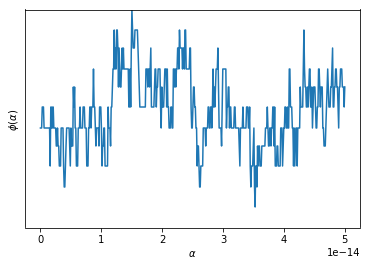

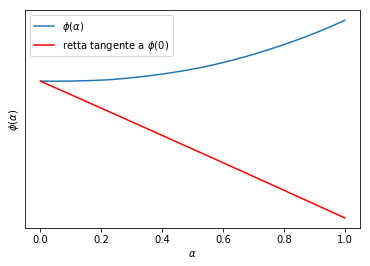

In [4]:
network = Network(architecture, neurons)

tic = time()
loss_tr_bfgs, miss_tr, \
loss_ts_bfgs, miss_ts, alphas_bfgs, \
norm_gradients_bfgs, cond_bfgs = network.train_BFGS(X_train, Y_train, 
                                                       X_test, Y_test,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon, debug=True)
toc = time()

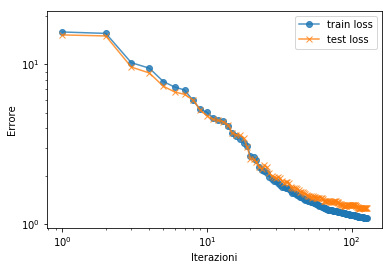

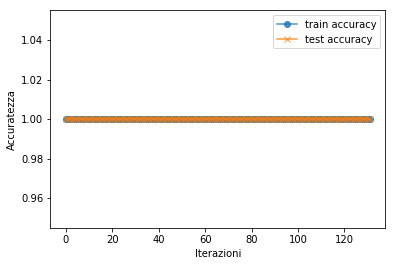

loss train: 1.09253748925
loss test: 1.26654392022
training time: 708.889164209
norm gradient last: 0.380938681321


In [7]:
plot_train_test_learning_curve(loss_ts_bfgs, loss_tr_bfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]

## L-BFGS - cup

In [5]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-4
c_2 = 0.9
theta = 0.7
lambda_ = 0
epsilon = 1e-5
epochs = 300
m = 10

network = Network(architecture, neurons)

0 out of 300
1 out of 300
2 out of 300
3 out of 300
4 out of 300
5 out of 300
6 out of 300
7 out of 300
8 out of 300
9 out of 300
10 out of 300
11 out of 300
12 out of 300
13 out of 300
14 out of 300
15 out of 300
16 out of 300
17 out of 300
18 out of 300
19 out of 300
20 out of 300
21 out of 300
22 out of 300
23 out of 300
24 out of 300
25 out of 300
26 out of 300
27 out of 300
28 out of 300
29 out of 300
30 out of 300
31 out of 300
32 out of 300
33 out of 300
34 out of 300
35 out of 300
36 out of 300
37 out of 300
38 out of 300
39 out of 300
40 out of 300
41 out of 300
42 out of 300
43 out of 300
44 out of 300
45 out of 300
46 out of 300
47 out of 300
48 out of 300
49 out of 300
50 out of 300
51 out of 300
52 out of 300
53 out of 300
54 out of 300
55 out of 300
56 out of 300
57 out of 300
58 out of 300
59 out of 300
60 out of 300
61 out of 300
62 out of 300
63 out of 300
64 out of 300
65 out of 300
66 out of 300
67 out of 300
68 out of 300
69 out of 300
70 out of 300
71 out of 300
72

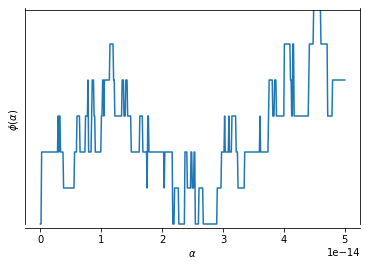

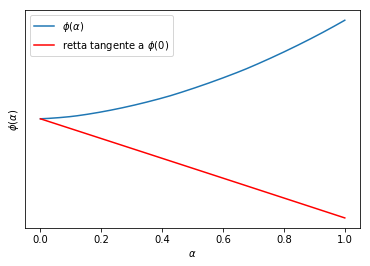

In [6]:
tic = time()
loss_tr_lbfgs, miss_tr, \
loss_ts_lbfgs, miss_ts, alphas_lbfgs, \
norm_gradients_lbfgs, cond_lbfgs = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m, debug=True)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_lbfgs, loss_tr_lbfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]

### ML-CUP - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)

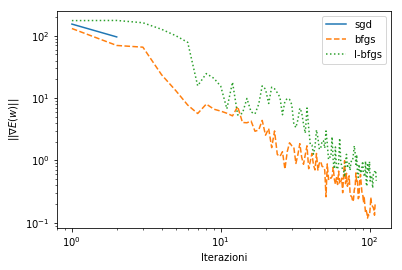

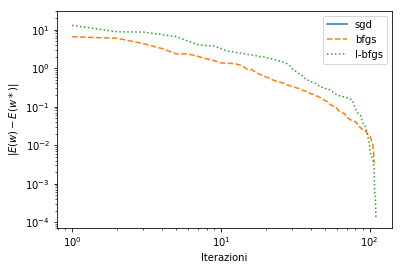

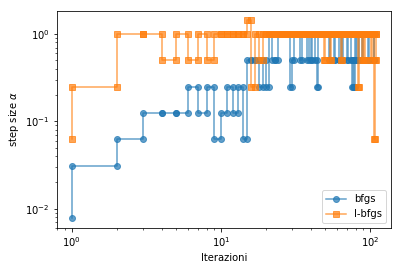

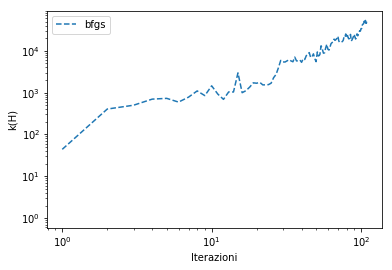

In [13]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

# Grid search

In [ ]:
# directory where to save learning curves
save_directory = './' 
# loss to optimize
loss = SquaredError("tangentH")

In [ ]:
# grid search parameters
grid = GridSearchSGDParams(learning_rate = [0.01, 0.001],
                           momentum = [0.5, 0.9], 
                           batch_size = [16, 32], 
                           architecture = [[17, 10, 1]],
                           neurons = [[InputNeuron, TanHNeuron, TanHNeuron]], 
                           regularization = [0.01, 0.001], 
                           epoch = 5)

# execute grid search
grid_search_SGD(grid, loss, train_patterns, train_labels,
                test_patterns, test_labels, n_trials=1, save_in_dir=save_directory)

In [ ]:
grid = GridSearchBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])         

grid_search_BFGS(grid, loss, train_patterns, train_labels,
                 test_patterns, test_labels, n_trials=2, save_in_dir=save_directory)

In [ ]:
grid = GridSearchLBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            m=[10, 20],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])

grid_search_LBFGS(grid, loss, train_patterns, train_labels,
                  test_patterns, test_labels,
                  n_trials=5, save_in_dir=save_directory)

## Save & load network parameters

In [ ]:
network = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron])   # random initialized
with open("test_weights.csv", "w") as out_file:
    network.dump_weights(out_file)
    
network_2 = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron]) # random initialized
with open("test_weights.csv", "r") as in_file:
    network_2.load_weights(in_file)
    
network.get_weights_as_vector() == network_2.get_weights_as_vector()

# BFGS vs L-BFGS
varying the parameter $m$ of L-BFGS

In [13]:
architecture = [17, 5, 5, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.7
lambda_ = 0
epsilon = 1e-5
epochs = 200
network_to_copy = Network(architecture, neurons)

In [14]:
# L-BFGS training
m_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
time_lbfgs = []
norm_gradient_lbfgs = []
losses_lbfgs = []
iters_lbfgs = []

for m_value in m_values:
    print m_value
    network = copy.deepcopy(network_to_copy)
    tic = time()
    loss_tr, _, _, _, _, norm_gradients, cond = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m_value)
    toc = time()
    
    # append results
    time_lbfgs.append(toc-tic)
    norm_gradient_lbfgs.append(norm_gradients)
    losses_lbfgs.append(loss_tr)
    iters_lbfgs.append(len(norm_gradients))

1
0 out of 200
1 out of 200
2 out of 200
3 out of 200
4 out of 200
5 out of 200
6 out of 200
7 out of 200
8 out of 200
9 out of 200
10 out of 200
11 out of 200
12 out of 200
13 out of 200
14 out of 200
15 out of 200
16 out of 200
17 out of 200
18 out of 200
19 out of 200
20 out of 200
21 out of 200
22 out of 200
23 out of 200
24 out of 200
25 out of 200
26 out of 200
27 out of 200
28 out of 200
29 out of 200
30 out of 200
31 out of 200
32 out of 200
33 out of 200
34 out of 200
35 out of 200
36 out of 200
37 out of 200
38 out of 200
39 out of 200
40 out of 200
41 out of 200
42 out of 200
43 out of 200
44 out of 200
45 out of 200
46 out of 200
47 out of 200
48 out of 200
49 out of 200
50 out of 200
51 out of 200
52 out of 200
53 out of 200
54 out of 200
55 out of 200
56 out of 200
57 out of 200
58 out of 200
59 out of 200
60 out of 200
61 out of 200
62 out of 200
63 out of 200
64 out of 200
65 out of 200
66 out of 200
67 out of 200
68 out of 200
69 out of 200
70 out of 200
71 out of 200


In [15]:
# BFGS train
network = copy.deepcopy(network_to_copy)
tic = time()
loss_tr_bfgs, _, _, _, _, norm_gradients_bfgs, cond = network.train_BFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon)
toc = time()

time_bfgs = toc-tic
iters_bfgs = len(norm_gradients_bfgs)

0 out of 200
1 out of 200
2 out of 200
3 out of 200
4 out of 200
5 out of 200
6 out of 200
7 out of 200
8 out of 200
9 out of 200
10 out of 200
11 out of 200
12 out of 200
13 out of 200
14 out of 200
15 out of 200
16 out of 200
17 out of 200
18 out of 200
19 out of 200
20 out of 200
21 out of 200
22 out of 200
23 out of 200
24 out of 200
25 out of 200
26 out of 200
27 out of 200
28 out of 200
29 out of 200
30 out of 200
31 out of 200
32 out of 200
33 out of 200
34 out of 200
35 out of 200
36 out of 200
37 out of 200
38 out of 200
39 out of 200
40 out of 200
41 out of 200
42 out of 200
43 out of 200
44 out of 200
45 out of 200
46 out of 200
47 out of 200
48 out of 200
49 out of 200
50 out of 200
51 out of 200
52 out of 200
53 out of 200
54 out of 200
55 out of 200
56 out of 200
57 out of 200
58 out of 200
59 out of 200
60 out of 200
61 out of 200
62 out of 200
63 out of 200
64 out of 200
65 out of 200
66 out of 200
67 out of 200
68 out of 200
69 out of 200
70 out of 200
71 out of 200
72

In [16]:
# time to reach the norm of the gradient less than epsilon
d = {'m': m_values, 'time': np.round(time_lbfgs,2), 'iters': iters_lbfgs, \
     'loss': [l[-1] for l in losses_lbfgs]}
print 'L-BFGS\n', pd.DataFrame(d, index=m_values)
print 'BFGS time:', round(time_bfgs,2), 'iters:', iters_bfgs, 'loss:', loss_tr_bfgs[-1]

L-BFGS
    iters          loss   m   time
1     113  3.340232e-07   1  22.56
3      73  4.882094e-07   3  12.26
5      62  3.278728e-02   5  11.58
7      37  6.557404e-02   7   5.56
9      36  6.557429e-02   9   5.58
11     35  6.557431e-02  11   5.68
13     37  6.557382e-02  13   5.58
15     34  6.557433e-02  15   4.91
17     34  6.557431e-02  17   5.04
BFGS time: 20.3 iters: 117 loss: 0.0327870747548


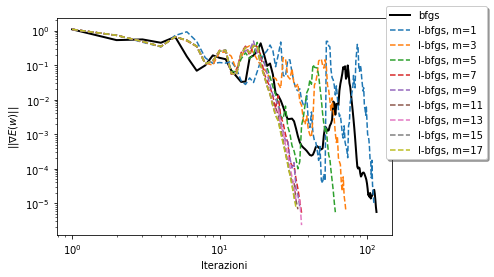

In [17]:
plt.plot(range(iters_bfgs), norm_gradients_bfgs, label='bfgs', color='black', linewidth=2)
for m, gnorm, iters in zip(m_values, norm_gradient_lbfgs, iters_lbfgs):
    plt.plot(range(iters), gnorm, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$||\nabla E(w)||$')
plt.show()

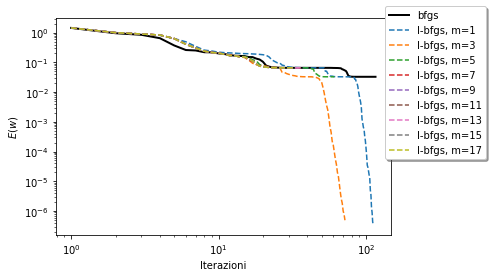

In [18]:
plt.plot(range(iters_bfgs), loss_tr_bfgs, label='bfgs', color='black', linewidth=2)
for m, loss, iters in zip(m_values, losses_lbfgs, iters_lbfgs):
    plt.plot(range(iters), loss, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$E(w)$')
plt.show()